In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from models.model import *
from dataset import *
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [42]:
#checkpoint_fn = 'checkpoint_fpn_gauss_add_background_no_rorate_exp2.pth'
#checkpoint_fn = 'checkpoint_fpn_gauss_add_background_MSE_exp1.pth'
checkpoint_fn = 'checkpoint_fpn_gauss_add_background_rotate_MSE_exp1.pth'
checkpoint = torch.load(checkpoint_fn)
print(checkpoint.keys())

dict_keys(['state_dict'])


In [43]:
model =DebulrFPN(in_channel=4)
model.load_state_dict(checkpoint['state_dict'])


<All keys matched successfully>

In [44]:
dataset = PhaseUnwarpDataset_withtrans(
        true_phase_dir='../PhaseUnwarp_datagen/np_data/test3000/test_true_crop_phase_3000.npy',
        trans_phase_dir='../PhaseUnwarp_datagen/np_data/test3000/test_trans_phase_add_ground_rorate.npy'
#        trans_phase_dir='../PhaseUnwarp_datagen/np_data/test3000/test_trans_phase_no_rorate_add_ground.npy'
)
print(dataset.__len__())


3000


In [45]:
data,label = dataset.__getitem__(980)
data = np.expand_dims(data,axis=0)
print(data.shape)
print(label.shape)

(1, 4, 256, 256)
(1, 256, 256)


In [46]:
model.eval()
data_tensor = torch.from_numpy(data)
pre_label = model(data_tensor).detach().cpu().numpy()
print(pre_label.shape)

(1, 1, 256, 256)


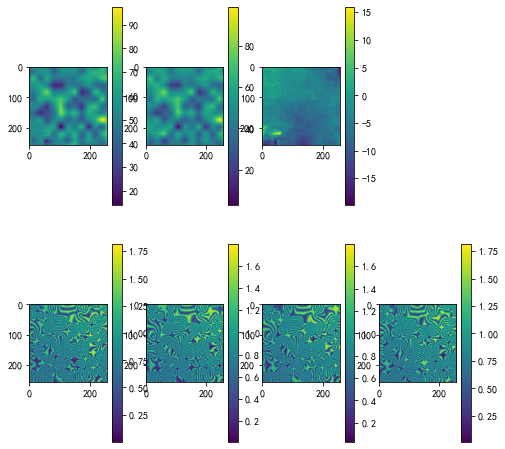

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(2,4,1)
plt.imshow(pre_label[0][0])
plt.colorbar()
plt.subplot(2,4,2)
plt.imshow(label[0])
plt.colorbar()
plt.subplot(2,4,3)
plt.imshow(label[0]-pre_label[0][0])
plt.colorbar()
plt.subplot(2,4,5)
plt.imshow(data[0][0])
plt.colorbar()
plt.subplot(2,4,6)
plt.imshow(data[0][1])
plt.colorbar()
plt.subplot(2,4,7)
plt.imshow(data[0][2])
plt.colorbar()
plt.subplot(2,4,8)
plt.imshow(data[0][3])
plt.colorbar()
# plt.show()

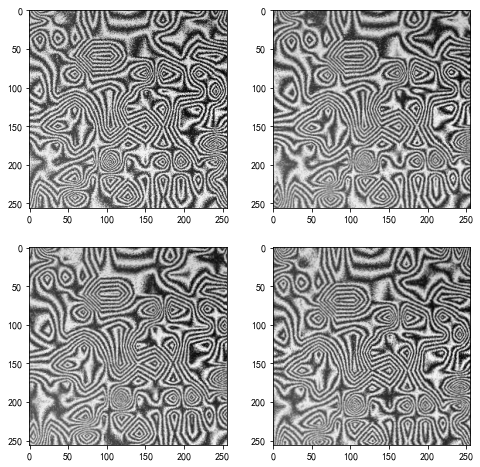

In [48]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(data[0][0],cmap='binary')
plt.subplot(2,2,2)
plt.imshow(data[0][1],cmap='binary')
plt.subplot(2,2,3)
plt.imshow(data[0][2],cmap='binary')
plt.subplot(2,2,4)
plt.imshow(data[0][3],cmap='binary')
plt.savefig("ShiftPhase.jpg")

Text(0.5, 1.0, '误差')

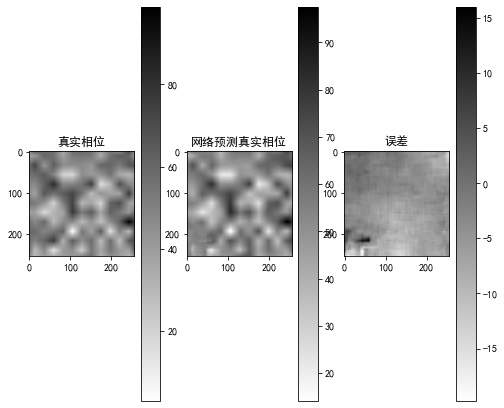

In [49]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
plt.imshow(label[0],cmap='binary')
plt.colorbar()
plt.title("真实相位")
plt.subplot(1,3,2)
plt.imshow(pre_label[0][0],cmap='binary')
plt.colorbar()
plt.title("网络预测真实相位")
plt.subplot(1,3,3)
plt.imshow(label[0]-pre_label[0][0],cmap='binary')
plt.colorbar()
plt.title("误差")


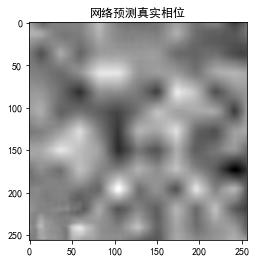

In [50]:
plt.imshow(pre_label[0][0],cmap='binary')
plt.title("网络预测真实相位")
plt.savefig('predition.jpg')